## Plot (a) preconditioning cost, (b) reconditioning cost, and (c) total system cost vs. electricity cost

### IMPORT MODULES

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# update plot formatting
mpl.rcParams.update({'font.size': 14})
mpl.rcParams.update({'mathtext.default': 'rm'})
mpl.rcParams.update({'font.family': 'sans-serif'})
mpl.rcParams.update({'font.sans-serif': 'Calibri'})

### USER INPUT

In [3]:
# output folder to use for plots
folder = 'outputs 2024-08-13 electricity cost'

In [4]:
# variable names to plot
x_var = 'electricity cost ($/kWh)'
y_var = 'total levelized cost of hydrogen ($/kg H2)'

### READ RESULTS: Costs by pathway and process

In [5]:
# read csv
f = 'output_cost by process.csv'
df = pd.read_csv(
    os.path.join('..\outputs', folder, f), 
    index_col='run #'
    )

# extract baseline value of input parameter
x_var_base = df.loc[
    df['scenario'] == 'closed loop', 
    x_var
].values[0]

# filter for sensitivity cases
df = df.loc[df['scenario'].str.contains('kWh')]

# rename pathways
df['pathway'] = df['pathway'].str.replace('compressed', 'Compr.')
df['pathway'] = df['pathway'].str.replace('liquid', 'Liq.')

In [6]:
# extract output dollar year
output_dollar_year = df['output dollar year'].values[0]

output_dollar_year

2022

In [7]:
# keep used columns
df = df[[
    x_var, 
    'pathway', 
    'process', 
    y_var
]]

df

,electricity cost ($/kWh),pathway,process,total levelized cost of hydrogen ($/kg H2)
run #,,,,
3,0.02,LOHC - formic acid,preconditioning,0.005925
3,0.02,LOHC - formic acid,production,20.059623
3,0.02,LOHC - formic acid,reconditioning,4.757560
3,0.02,LOHC - formic acid,transport,0.994497
3,0.02,Compr. hydrogen,preconditioning,2.128052
...,...,...,...,...
17,0.30,Compr. hydrogen,transport,0.877489
17,0.30,Liq. hydrogen,preconditioning,6.161069
17,0.30,Liq. hydrogen,production,0.310093


### DATA PROCESSING: Preconditioning costs by pathway

In [8]:
# filter for preconditioning costs
df_prec = df.loc[df['process'] == 'preconditioning']

# pivot dataframe
df_prec = df_prec.pivot(
    index=x_var,
    columns='pathway',
    values=y_var
)

df_prec

pathway,Compr. hydrogen,LOHC - formic acid,Liq. hydrogen
electricity cost ($/kWh),,,
0.02,2.128052,0.005925,3.184694
0.04,2.174827,0.005925,3.397293
0.06,2.221602,0.005925,3.609891
0.08,2.268377,0.005925,3.822489
0.10,2.315152,0.005925,4.035087
0.12,2.361927,0.005925,4.247685
0.14,2.408703,0.005925,4.460284
0.16,2.455478,0.005925,4.672882
0.18,2.502253,0.005925,4.885480


### DATA PROCESSING: Reconditioning costs by pathway

In [9]:
# filter for reconditioning costs
df_rec = df.loc[df['process'] == 'reconditioning']

# pivot dataframe
df_rec = df_rec.pivot(
    index=x_var,
    columns='pathway',
    values=y_var
)

df_rec

pathway,Compr. hydrogen,LOHC - formic acid,Liq. hydrogen
electricity cost ($/kWh),,,
0.02,2.297670,4.757560,1.792082
0.04,2.324950,4.933822,1.801909
0.06,2.352229,5.110084,1.811736
0.08,2.379509,5.286346,1.821563
0.10,2.406788,5.462608,1.831390
0.12,2.434068,5.638871,1.841217
0.14,2.461347,5.815133,1.851043
0.16,2.488627,5.991395,1.860870
0.18,2.515906,6.167657,1.870697


### DATA PROCESSING: Total system costs by pathway

In [10]:
# calculate total costs by pathway
df_tot = df.groupby(
    by=[x_var, 'pathway']
)[y_var].sum().reset_index()

# pivot dataframe
df_tot = df_tot.pivot(
    index=x_var,
    columns='pathway',
    values=y_var
)

df_tot

pathway,Compr. hydrogen,LOHC - formic acid,Liq. hydrogen
electricity cost ($/kWh),,,
0.02,5.613211,25.817605,5.596277
0.04,5.687266,26.669287,5.818703
0.06,5.761320,27.520969,6.041128
0.08,5.835375,28.372651,6.263553
0.10,5.909430,29.224333,6.485978
0.12,5.983484,30.076015,6.708403
0.14,6.057539,30.927698,6.930828
0.16,6.131594,31.779380,7.153253
0.18,6.205648,32.631062,7.375679


### PLOT: Total terminal and system costs vs. terminal storage duration

In [11]:
# define colors (and order) for delivery pathways
pw_colors = {
    'Compr. hydrogen' : '#d95f02',
    'Liq. hydrogen' : '#1b9e77',
    'LOHC - formic acid' : '#7570b3',
    }

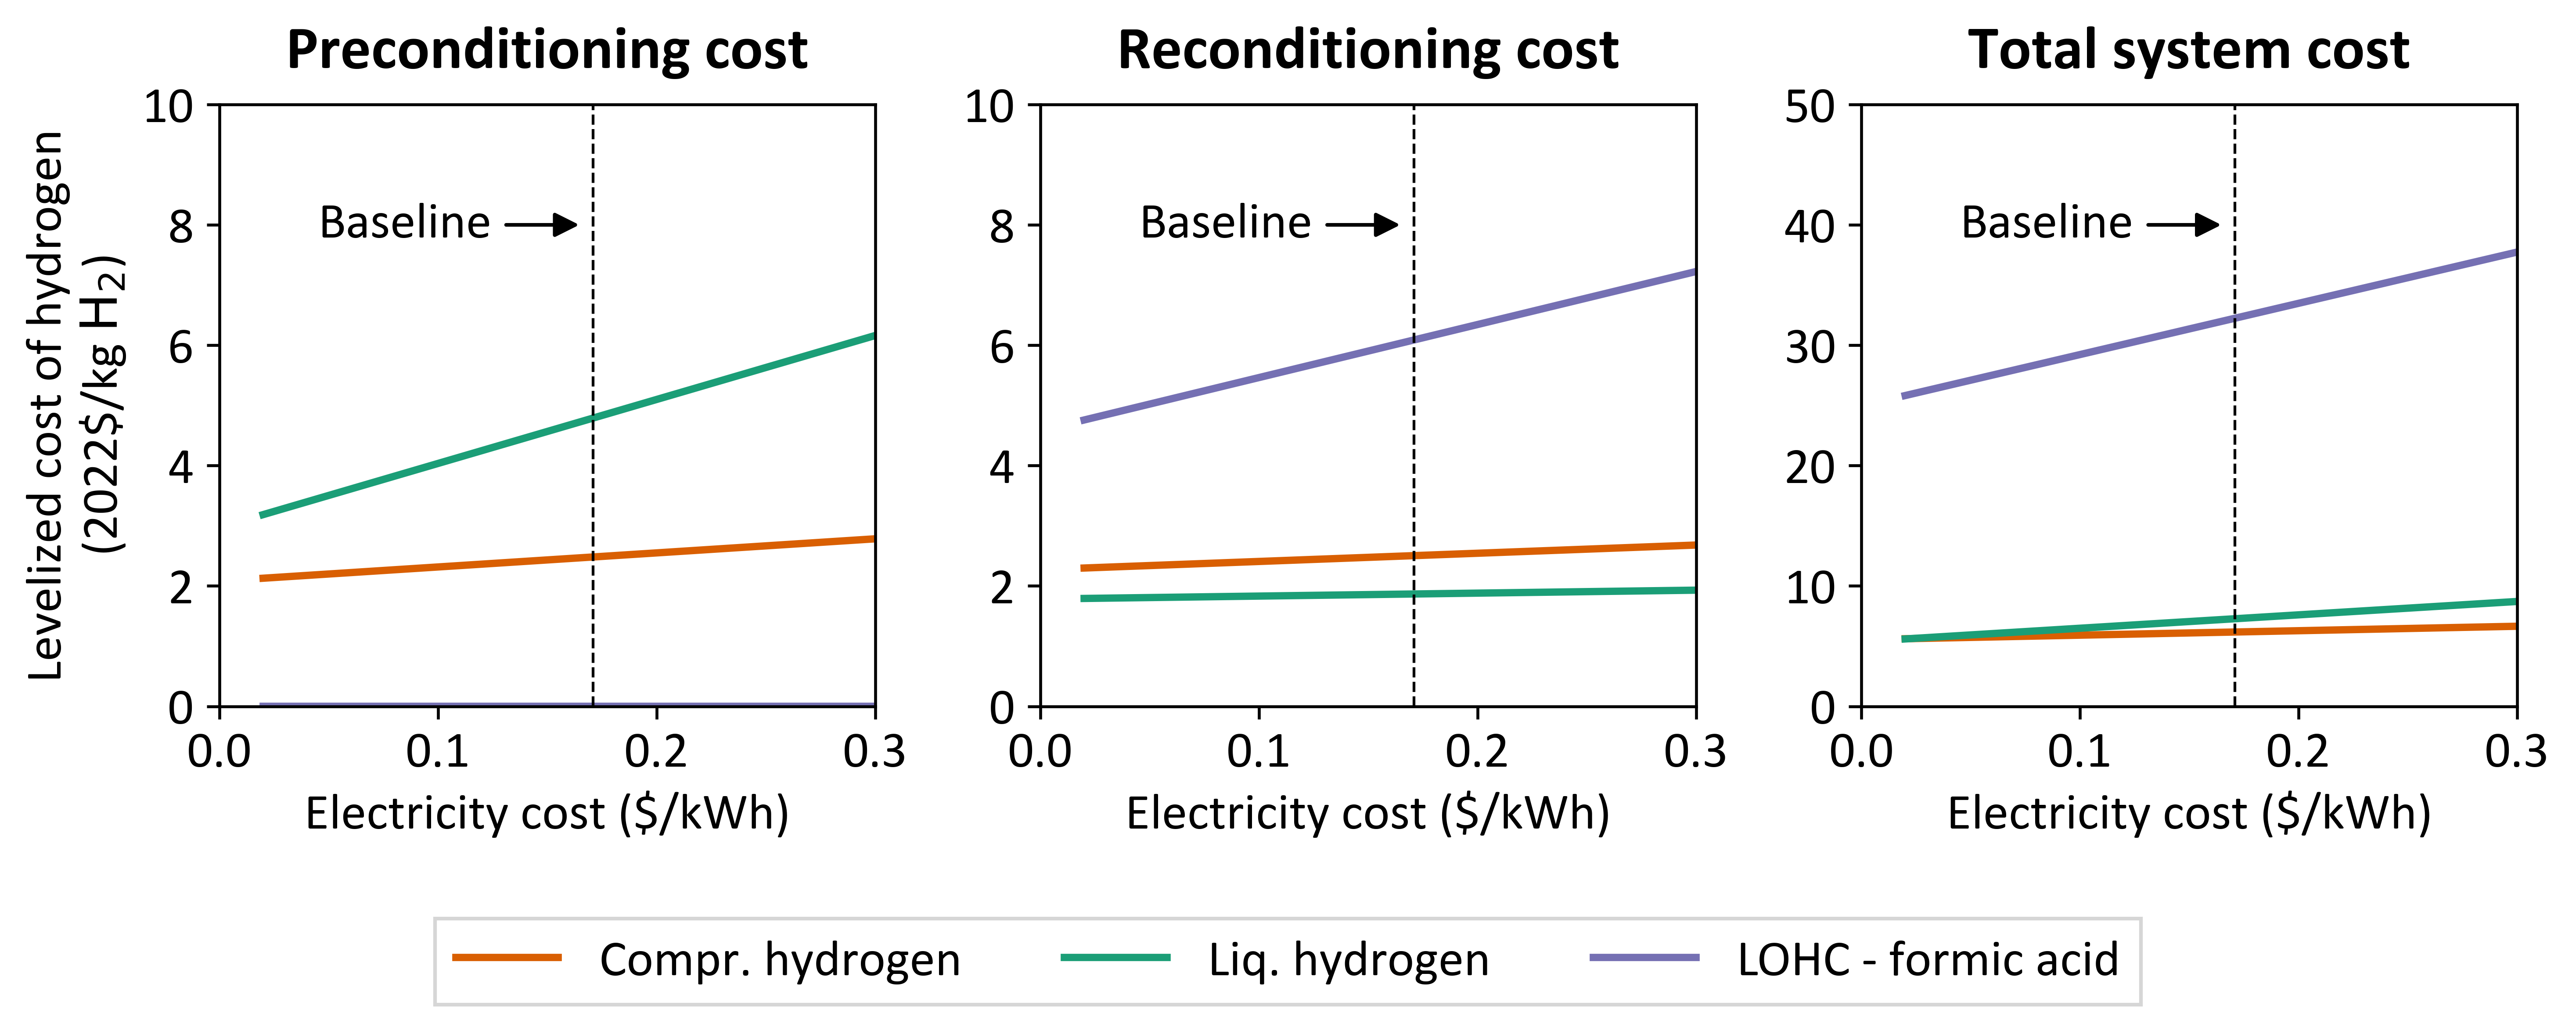

In [12]:
# create subplots
fig, axes = plt.subplots(
    figsize=(10, 3.5),
    ncols=3,
    layout='tight',
    dpi=600
    )

for pw, color in pw_colors.items():

    # plot preconditioning costs
    df_prec[pw].plot(
        ax=axes[0],
        linewidth=2.0,
        color=color,
        xticks=np.arange(0, 1, 0.1),
        xlim=(0, 0.3),
        xlabel='Electricity cost ($/kWh)',
        ylabel='Levelized cost of hydrogen\n' + \
            '({:0.0f}\\$/kg'.format(output_dollar_year) + \
            ' ${H_2}$)',
        yticks=np.arange(0, 101, 2),
        ylim=(0, 10),
        )

    # plot reconditioning costs
    df_rec[pw].plot(
        ax=axes[1],
        linewidth=2.0,
        color=color,
        xticks=np.arange(0, 1, 0.1),
        xlim=(0, 0.3),
        xlabel='Electricity cost ($/kWh)',
        yticks=np.arange(0, 101, 2),
        ylim=(0, 10),
        )

    # plot total system costs
    df_tot[pw].plot(
        ax=axes[2],
        linewidth=2.0,
        color=color,
        xticks=np.arange(0, 1, 0.1),
        xlim=(0, 0.3),
        xlabel='Electricity cost ($/kWh)',
        yticks=np.arange(0, 101, 10),
        ylim=(0, 50),
        )

# add vertical lines and annotations for baseline input parameter
for ax in axes:
    ax.axvline(
        x=x_var_base,
        color='black',
        linewidth=0.75,
        linestyle='--',
    )

    ax.annotate(
        text='Baseline',
        xy=(0.56, 0.8),
        xytext=(0.15, 0.8),
        xycoords='axes fraction',
        ha='left',
        va='center',
        arrowprops=dict(
            arrowstyle='-|>',
            color='black',
        )
    )

# update subplot title
axes[0].set_title(
    'Preconditioning cost',
    pad=10,
    fontweight='bold',
)

axes[1].set_title(
    'Reconditioning cost',
    pad=10,
    fontweight='bold',
)

axes[2].set_title(
    'Total system cost',
    pad=10,
    fontweight='bold',
)

# update legend for figure
handles, labels = axes[-1].get_legend_handles_labels()

fig.legend(
    handles=handles, 
    labels=labels, 
    # frameon=False,
    fancybox=False,
    bbox_to_anchor=(0.5, 0), 
    loc='upper center',
    ncols=3
    )

# save plot
plt.savefig(
    'total costs vs electricity cost.svg',
    bbox_inches='tight'
    )

# show plot
plt.show()